In [79]:
!pip install beautifulsoup4

In [80]:
from bs4 import BeautifulSoup
import requests
url  = BeautifulSoup('https://www.sharesansar.com/live-trading', 'html.parser')
soup = requests.get(url)
soup = BeautifulSoup(soup.text, "lxml")
soup

C:\Users\hp\AppData\Local\Temp\ipykernel_41492\4067807627.py:3: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, user-scalable=no, initial-scale = 1.0, minimum-scale=1.0, maximum-scale = 1.0" name="viewport"/>
<meta content=" sharesansar, sharesansar.com, share market, best site, nepali bazar, news, nepal, economics, politics, entertainment, business, politics, businessman, online news, real state, tax, banking, corporate, telecom,  nepse, ipo, agm, bond, Oil, Gold, profit, shareholder, NEPSE, pravhu, ILFC, Stock, exchange, citizen, nepal., loan, loss, provision,  arun, valley, kabeli,  Economy, Growth, Rate, Eid, Public, Holiday,  Mastercard, Standard, Chartered, Credit, Card, Visa, Warren, Buffett, Value, Investing,Nepal Stock Exchange (NEPSE) Live Trading Data, Floorsheet, Live Indices, Top Gainers, Top Losers, nepse, shareapp, limted, iporesult, bank , share, bank, company, promoter, bittya santha" name="keywords"/>
<title>Live Trading - || ShareSansar ||</title>
<!--[if IE]><script src="http://

In [81]:
table = soup.css.select(".table-responsive")[0]
tags = table.find_all('tr')
tags

[<tr>
 <th width="10px">S.No</th>
 <th>Symbol</th>
 <th class="text-center">LTP</th>
 <th class="text-center">Point Change</th>
 <th class="text-center">% Change</th>
 <th class="text-center">Open</th>
 <th class="text-center">High</th>
 <th class="text-center">Low</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Prev. Close</th>
 </tr>,
 <tr>
 <td class="danger-index">
                                         1</td>
 <td class="danger-index">
 <a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
 </td>
 <td class="text-center danger-index">
                                         1,097.60</td>
 <td class="text-center danger-index">
                                         -2.40</td>
 <td class="text-center danger-index">
                                         -0.22</td>
 <td class="text-center danger-index">
                                         1,101.00</td>
 <td class="text-center danger-index">
                                      

In [82]:
data=[]
for tag in tags:
    data.append(tag.text)

data
    

['\nS.No\nSymbol\nLTP\nPoint Change\n% Change\nOpen\nHigh\nLow\nVolume\nPrev. Close\n',
 '\n\n                                        1\n\nACLBSL\n\n\n                                        1,097.60\n\n                                        -2.40\n\n                                        -0.22\n\n                                        1,101.00\n\n                                        1,115.00\n\n                                        1,095.40\n\n                                        1,301.00\n\n                                        1,100.00\n',
 '\n\n                                        2\n\nADBL\n\n\n                                        285.66\n\n                                        -0.44\n\n                                        -0.15\n\n                                        284.00\n\n                                        288.00\n\n                                        283.00\n\n                                        16,174.00\n\n                          

In [83]:
stock_data = []
for j in data[1:]:
    x= (j.replace("                                        ","").split("\n\n"))
    y= [k.replace('\n','') for k in x]
    stock_data.append(y[1:])

In [84]:
header = data[0].split('\n')[1:-1]
print(header)

['S.No', 'Symbol', 'LTP', 'Point Change', '% Change', 'Open', 'High', 'Low', 'Volume', 'Prev. Close']


In [85]:
import pandas as pd
df = pd.DataFrame(stock_data,columns=header)
df

,S.No,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
0,1,ACLBSL,"1,097.60",-2.40,-0.22,"1,101.00","1,115.00","1,095.40","1,301.00","1,100.00"
1,2,ADBL,285.66,-0.44,-0.15,284.00,288.00,283.00,"16,174.00",286.10
2,3,ADBLD83,"1,100.00",15.00,1.38,"1,100.00","1,100.00","1,100.00",100.00,"1,085.00"
3,4,AHL,750.83,39.83,5.60,708.00,757.00,707.10,"14,801.00",711.00
4,5,AHPC,254.78,-3.12,-1.21,256.00,259.70,254.00,"89,069.00",257.90
...,...,...,...,...,...,...,...,...,...,...
307,308,USHL,748.94,-0.06,-0.01,735.10,759.90,735.10,"3,080.00",749.00
308,309,USLB,"1,698.31",19.31,1.15,"1,712.00","1,712.00","1,691.00","3,132.00","1,679.00"
309,310,VLBS,850.00,-2.00,-0.23,855.00,855.00,840.00,"2,153.00",852.00
310,311,VLUCL,689.81,-13.19,-1.88,694.00,705.00,683.10,"14,015.00",703.00


In [86]:
df['Volume']= df['Volume'].str.replace(',','').astype('float')
df_sorted = df.sort_values(by=['Volume'],ascending=False)
df_sorted

,S.No,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
60,61,GHL,294.20,-3.80,-1.28,297.00,299.00,290.00,445853.0,298.00
299,300,UMHL,447.52,8.72,1.99,440.00,450.00,433.20,366814.0,438.80
87,88,HRL,964.06,-12.94,-1.32,977.00,986.00,961.00,238596.0,977.00
144,145,MLBL,410.39,-7.61,-1.82,418.00,422.00,409.20,225151.0,418.00
194,195,NRIC,"1,277.86",-4.24,-0.33,"1,280.00","1,283.00","1,267.00",221127.0,"1,282.10"
...,...,...,...,...,...,...,...,...,...,...
182,183,NIMBD90,"1,116.00",0.80,0.07,"1,115.20","1,115.20","1,115.20",1.0,"1,115.20"
187,188,NLO,276.90,0.00,0.00,276.90,276.90,276.90,1.0,276.90
190,191,NMBD2085,"1,080.00",2.50,0.23,"1,077.50","1,077.50","1,077.50",1.0,"1,077.50"
203,204,PBD84,"1,070.00",2.90,0.27,"1,067.10","1,067.10","1,067.10",1.0,"1,067.10"


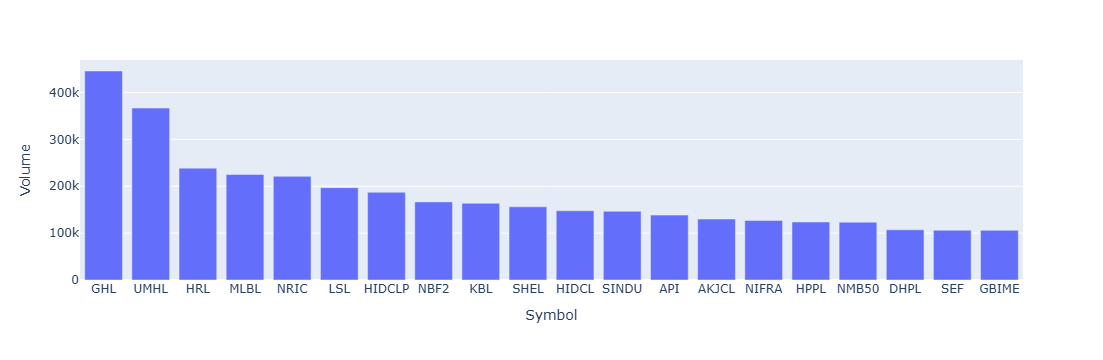

In [92]:
import plotly.express as px
fig = px.bar(df_sorted.head(20), x='Symbol', y='Volume')
fig.show()

In [94]:
df['% Change']= df['% Change'].astype('float')
df_sorted = df.sort_values(by=['% Change'],ascending=False)
df_sorted

,S.No,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
43,44,DOLTI,723.72,46.72,6.90,680.00,742.00,677.00,43193.0,677.00
3,4,AHL,750.83,39.83,5.60,708.00,757.00,707.10,14801.0,711.00
264,265,SINDU,"1,143.91",54.91,5.04,"1,110.00","1,156.50","1,067.30",146530.0,"1,089.00"
67,68,GMLI,"2,035.52",93.52,4.82,"1,940.00","2,080.00","1,922.10",63141.0,"1,942.00"
103,104,KBLD86,"1,165.00",45.00,4.02,"1,135.00","1,165.00","1,135.00",200.0,"1,120.00"
...,...,...,...,...,...,...,...,...,...,...
275,276,SMHL,952.74,-32.26,-3.28,969.00,980.00,950.00,19983.0,985.00
104,105,KBSH,"2,405.25",-84.75,-3.40,"2,490.00","2,519.90","2,405.10",446.0,"2,490.00"
69,70,GSY,8.98,-0.82,-8.37,9.61,9.61,8.90,8549.0,9.80
143,144,MLBBL,"1,782.00",-198.00,-10.00,"2,019.00","2,019.00","1,782.00",2614.0,"1,980.00"


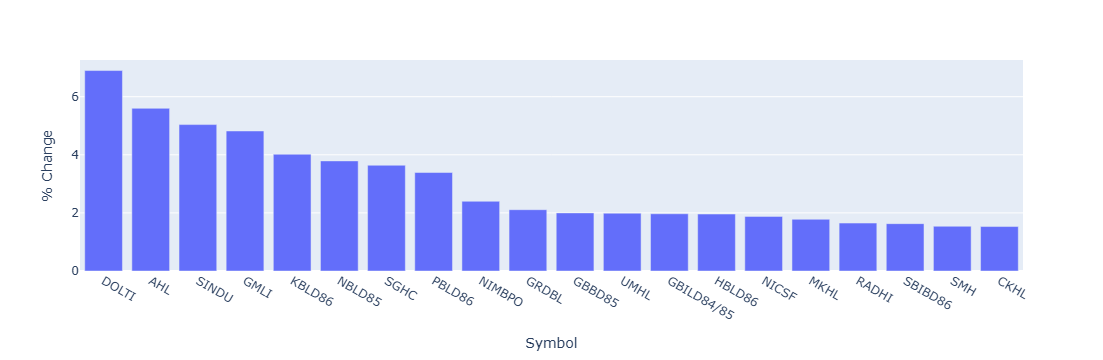

In [96]:
import plotly.express as px
fig = px.bar(df_sorted.head(20), x='Symbol', y='% Change')
fig.show()

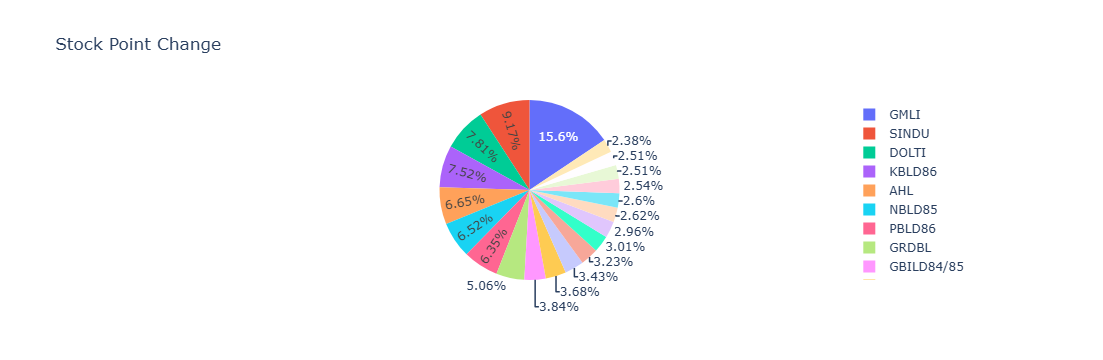

In [98]:
df['Point Change']= df['Point Change'].astype('float')
df_sorted = df.sort_values(by=['Point Change'],ascending=False)

import plotly.express as px
fig = px.pie(df_sorted.head(20), values='Point Change', names='Symbol', title='Stock Point Change')
fig.show()